Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


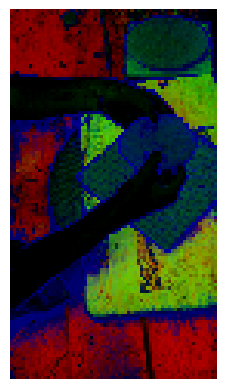

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import torch
import matplotlib.pyplot as plt

features = torch.load("../data/hypernerf/split-cookie/rgb/features.pt")
emb = features["000020.png"]
emb = torch.nn.functional.normalize(emb, dim=0).permute(1,2,0)
# print(emb.shape)
# C, H, W = emb.shape
X = emb.flatten(0, 1).cpu().numpy()
np.random.seed(6)
pca = PCA(n_components=3)
pca.fit(X)
X_rgb = pca.transform(X).reshape(*emb.shape[:2], 3)
plt.imshow(X_rgb)
plt.axis("off")
plt.show()